### To know about VAR Model

#### https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/#:~:text=A%20Multivariate%20time%20series%20has,used%20for%20forecasting%20future%20values.&text=In%20this%20case%2C%20there%20are,considered%20to%20optimally%20predict%20temperature.

In [1]:
#IMporting all the required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [4]:
# !pip install plotly
# !pip install cufflinks

In [46]:
# from plotly.offline import iplot
# import cufflinks as cf
# cf.go_offline()

In [5]:
from statsmodels.tsa.api import VAR

In [6]:
#Setting up the default figure size
plt.rcParams['figure.figsize'] = [11.0, 7.0]
plt.rcParams['figure.dpi'] = 90

In [7]:
#df.to_csv('Final_Weather_Report.csv')

In [8]:
df = pd.read_csv('Final_Weather_Report.csv')

In [9]:
pwd

'D:\\JUPYTER\\PROJECTS\\Temprature_Prediction'

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257696 entries, 0 to 257695
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         257696 non-null  int64 
 1   Weather_Condition  257696 non-null  object
 2   Tem.               257696 non-null  int64 
 3   Hum                257696 non-null  int64 
 4   Presure            257696 non-null  int64 
 5   Date               257696 non-null  object
dtypes: int64(4), object(2)
memory usage: 11.8+ MB


In [11]:
df.head()

,Unnamed: 0,Weather_Condition,Tem.,Hum,Presure,Date
0,0,Mist,13,82,1018,01-01-2019
1,1,Mist,13,82,1018,01-01-2019
2,2,Mist,12,82,1018,01-01-2019
3,3,Mist,12,82,1018,01-01-2019
4,4,Mist,12,82,1018,01-01-2019


In [12]:
df.columns

Index(['Unnamed: 0', 'Weather_Condition', 'Tem.', 'Hum', 'Presure', 'Date'], dtype='object')

In [13]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [14]:
df.head()

,Weather_Condition,Tem.,Hum,Presure,Date
0,Mist,13,82,1018,01-01-2019
1,Mist,13,82,1018,01-01-2019
2,Mist,12,82,1018,01-01-2019
3,Mist,12,82,1018,01-01-2019
4,Mist,12,82,1018,01-01-2019


In [15]:
df.isnull().sum()

Weather_Condition    0
Tem.                 0
Hum                  0
Presure              0
Date                 0
dtype: int64

In [16]:
df['Tem.']=df['Tem.'].astype('int32')

In [17]:
df['Hum']=df['Hum'].astype('int32')

In [18]:
df['Presure']=df['Presure'].astype('int32')

In [19]:
df['Weather_Condition'] = df['Weather_Condition'].astype('str')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257696 entries, 0 to 257695
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Weather_Condition  257696 non-null  object
 1   Tem.               257696 non-null  int32 
 2   Hum                257696 non-null  int32 
 3   Presure            257696 non-null  int32 
 4   Date               257696 non-null  object
dtypes: int32(3), object(2)
memory usage: 6.9+ MB


In [21]:
df.set_index('Date',inplace=True)

In [22]:
df.index

Index(['01-01-2019', '01-01-2019', '01-01-2019', '01-01-2019', '01-01-2019',
       '01-01-2019', '01-01-2019', '01-01-2019', '01-01-2019', '01-01-2019',
       ...
       '17-12-2019', '17-12-2019', '17-12-2019', '17-12-2019', '17-12-2019',
       '17-12-2019', '17-12-2019', '17-12-2019', '17-12-2019', '17-12-2019'],
      dtype='object', name='Date', length=257696)

In [23]:
df.index = pd.DatetimeIndex(df.index).to_period('D') 

In [24]:
len(df.asfreq('d').index)

257696

In [25]:
df.index

PeriodIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
             '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
             '2019-01-01', '2019-01-01',
             ...
             '2019-12-17', '2019-12-17', '2019-12-17', '2019-12-17',
             '2019-12-17', '2019-12-17', '2019-12-17', '2019-12-17',
             '2019-12-17', '2019-12-17'],
            dtype='period[D]', name='Date', length=257696, freq='D')

In [26]:
df.head()

,Weather_Condition,Tem.,Hum,Presure
Date,,,,
2019-01-01,Mist,13,82,1018
2019-01-01,Mist,13,82,1018
2019-01-01,Mist,12,82,1018
2019-01-01,Mist,12,82,1018
2019-01-01,Mist,12,82,1018


In [27]:
df.drop('Weather_Condition',axis=1,inplace=True)

In [28]:
df.head()

,Tem.,Hum,Presure
Date,,,
2019-01-01,13,82,1018
2019-01-01,13,82,1018
2019-01-01,12,82,1018
2019-01-01,12,82,1018
2019-01-01,12,82,1018


In [29]:
df = df.resample('D').mean()

In [30]:
df.head()

,Tem.,Hum,Presure
Date,,,
2019-01-01,16.808511,66.085106,1018.042553
2019-01-02,19.437500,63.270833,1015.020833
2019-01-03,20.416667,68.312500,1014.104167
2019-01-04,27.500000,77.395833,1008.458333
2019-01-05,31.854167,73.708333,1004.708333


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 351 entries, 2019-01-01 to 2019-12-17
Freq: D
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tem.            350 non-null    float64
 1   Hum             350 non-null    float64
 2   Presure         350 non-null    float64
 3   Drizzle         350 non-null    float64
 4   Fair            350 non-null    float64
 5   Fog             350 non-null    float64
 6   Light Rain      350 non-null    float64
 7   Mist            350 non-null    float64
 8   Mostly Cloudy   350 non-null    float64
 9   Partly Cloudy   350 non-null    float64
 10  Rain            350 non-null    float64
 11  T-Storm         350 non-null    float64
 12  Widespread Fog  350 non-null    float64
dtypes: float64(13)
memory usage: 38.4 KB


In [38]:
df.isnull().sum()

Tem.       1
Hum        1
Presure    1
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 351 entries, 2019-01-01 to 2019-12-17
Freq: D
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Tem.            350 non-null    float64
 1   Hum             350 non-null    float64
 2   Presure         350 non-null    float64
 3   Drizzle         350 non-null    float64
 4   Fair            350 non-null    float64
 5   Fog             350 non-null    float64
 6   Light Rain      350 non-null    float64
 7   Mist            350 non-null    float64
 8   Mostly Cloudy   350 non-null    float64
 9   Partly Cloudy   350 non-null    float64
 10  Rain            350 non-null    float64
 11  T-Storm         350 non-null    float64
 12  Widespread Fog  350 non-null    float64
dtypes: float64(13)
memory usage: 38.4 KB


In [31]:
df.dropna(inplace=True)

In [32]:
df.isnull().sum()

Tem.       0
Hum        0
Presure    0
dtype: int64

In [33]:
df.tail()

,Tem.,Hum,Presure
Date,,,
2019-12-13,21.503987,74.904306,1015.130781
2019-12-14,21.520000,75.528889,1015.220741
2019-12-15,21.446750,76.139696,1015.261411
2019-12-16,21.368353,76.355383,1015.272374
2019-12-17,21.285714,76.554335,1015.339438


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 350 entries, 2019-01-01 to 2019-12-17
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tem.     350 non-null    float64
 1   Hum      350 non-null    float64
 2   Presure  350 non-null    float64
dtypes: float64(3)
memory usage: 10.9 KB


In [35]:
df.head()

,Tem.,Hum,Presure
Date,,,
2019-01-01,16.808511,66.085106,1018.042553
2019-01-02,19.437500,63.270833,1015.020833
2019-01-03,20.416667,68.312500,1014.104167
2019-01-04,27.500000,77.395833,1008.458333
2019-01-05,31.854167,73.708333,1004.708333


In [36]:
df.tail()

,Tem.,Hum,Presure
Date,,,
2019-12-13,21.503987,74.904306,1015.130781
2019-12-14,21.520000,75.528889,1015.220741
2019-12-15,21.446750,76.139696,1015.261411
2019-12-16,21.368353,76.355383,1015.272374
2019-12-17,21.285714,76.554335,1015.339438


In [37]:
df.index

PeriodIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
             '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
             '2019-01-09', '2019-01-10',
             ...
             '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11',
             '2019-12-12', '2019-12-13', '2019-12-14', '2019-12-15',
             '2019-12-16', '2019-12-17'],
            dtype='period[D]', name='Date', length=350, freq='D')

In [38]:
new_df = df.copy()

In [39]:
new_df.head()

,Tem.,Hum,Presure
Date,,,
2019-01-01,16.808511,66.085106,1018.042553
2019-01-02,19.437500,63.270833,1015.020833
2019-01-03,20.416667,68.312500,1014.104167
2019-01-04,27.500000,77.395833,1008.458333
2019-01-05,31.854167,73.708333,1004.708333


In [40]:
date_s = pd.date_range('2019-01-01',periods=350,freq='D')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 350 entries, 2019-01-01 to 2019-12-17
Freq: D
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tem.     350 non-null    float64
 1   Hum      350 non-null    float64
 2   Presure  350 non-null    float64
dtypes: float64(3)
memory usage: 10.9 KB


In [42]:
len(df.index)

350

In [43]:
df.index = date_s

In [44]:
df.head()

,Tem.,Hum,Presure
2019-01-01,16.808511,66.085106,1018.042553
2019-01-02,19.437500,63.270833,1015.020833
2019-01-03,20.416667,68.312500,1014.104167
2019-01-04,27.500000,77.395833,1008.458333
2019-01-05,31.854167,73.708333,1004.708333


In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Tem.,350.0,26.440219,4.088272,16.808511,24.011726,28.407754,29.390881,31.854167
Hum,350.0,78.188901,8.418536,59.300000,72.754044,79.687630,85.722409,89.887460
Presure,350.0,1007.038717,6.387320,995.458333,1000.795671,1008.197344,1011.447121,1018.196891


In [46]:
df.corr()

,Tem.,Hum,Presure
Tem.,1.000000,0.749004,-0.850112
Hum,0.749004,1.000000,-0.773526
Presure,-0.850112,-0.773526,1.000000


<AxesSubplot:>

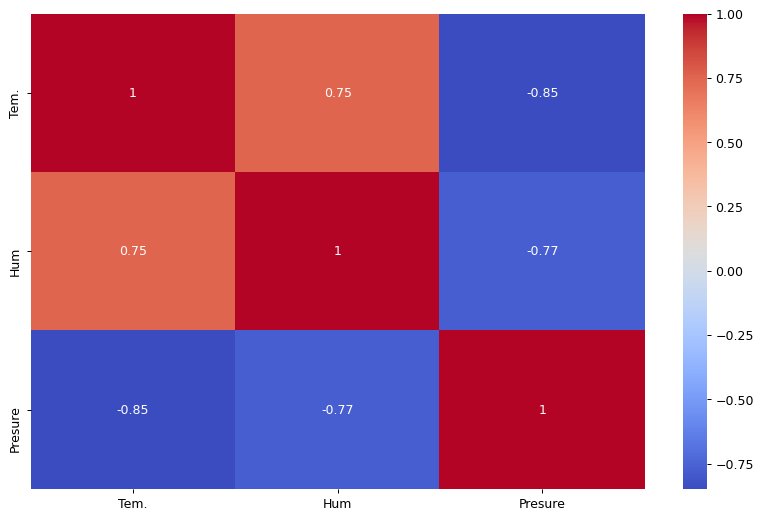

In [47]:
# Let's do a corelation plot
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [48]:
df.columns

Index(['Tem.', 'Hum', 'Presure'], dtype='object')

<AxesSubplot:>

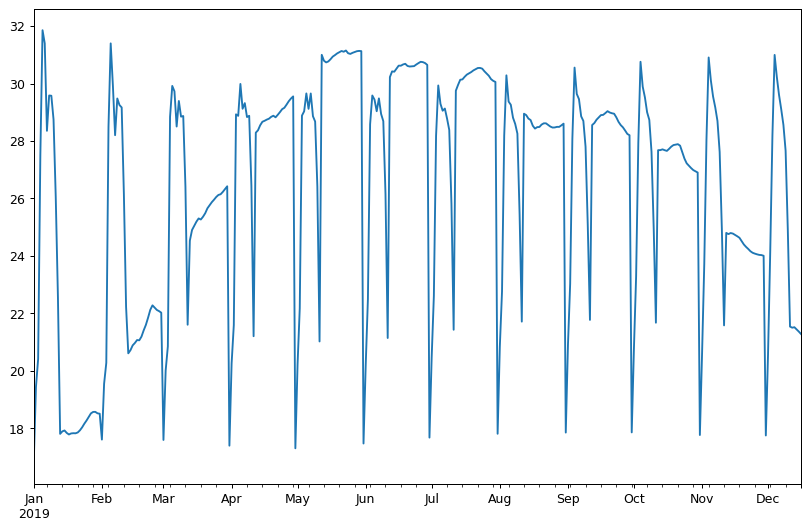

In [49]:
df['Tem.'].plot()

<AxesSubplot:>

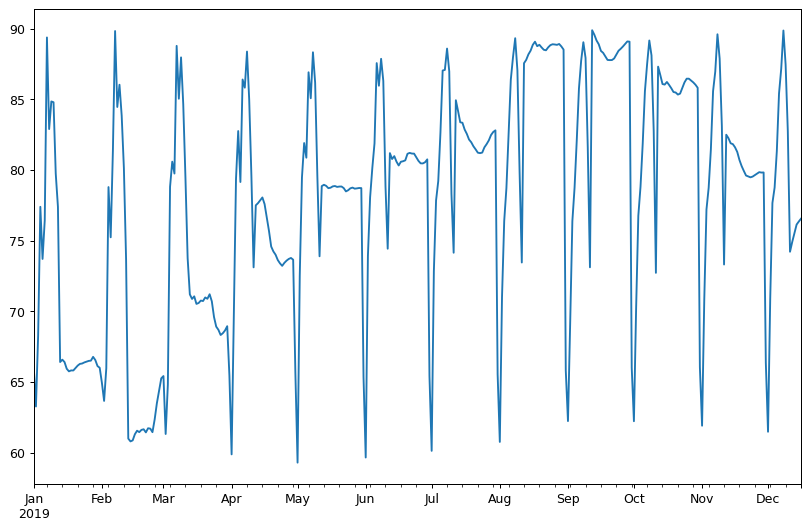

In [50]:
df['Hum'].plot()

<AxesSubplot:>

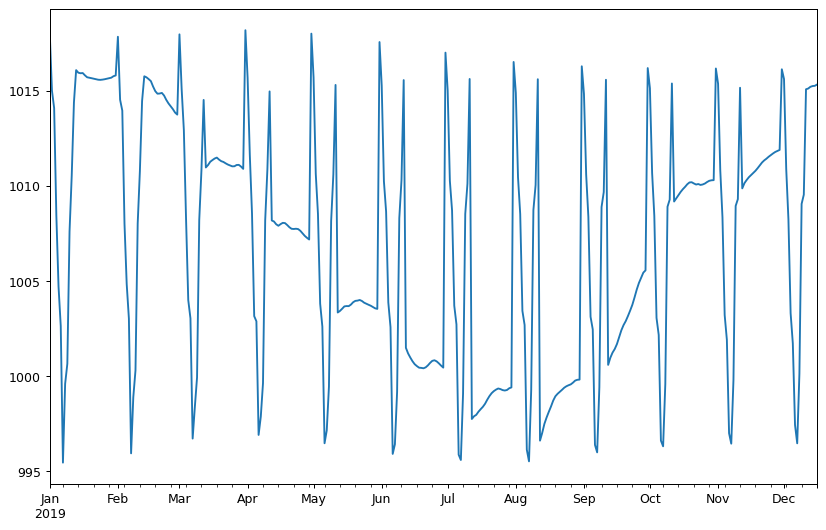

In [51]:
df['Presure'].plot()

### Doing ETS decomposition

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [49]:
results = seasonal_decompose(df['Tem.'],model='additive')

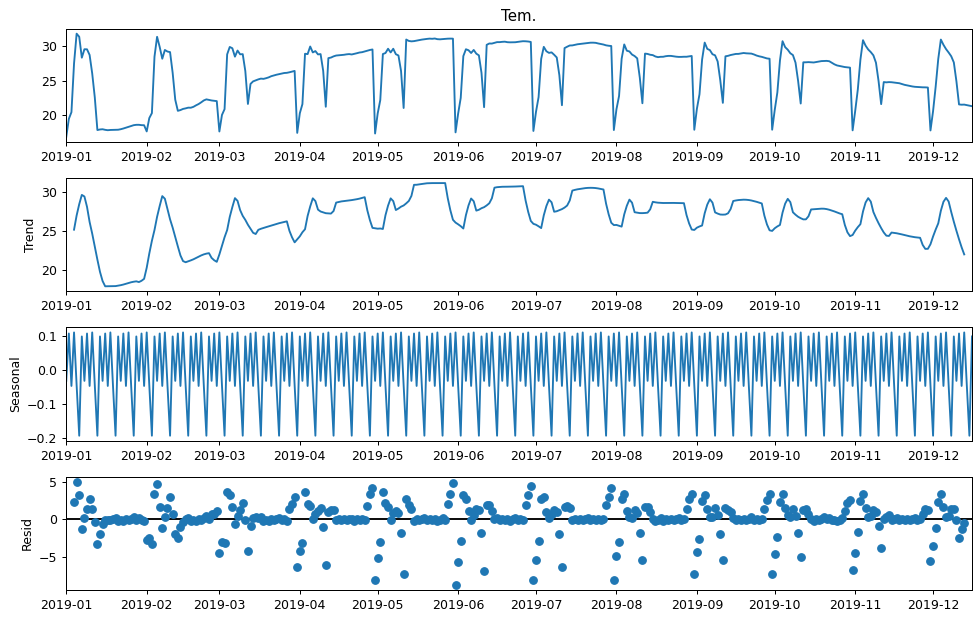

In [50]:
results.plot();

In [51]:
results = seasonal_decompose(df['Hum'],model='additive')

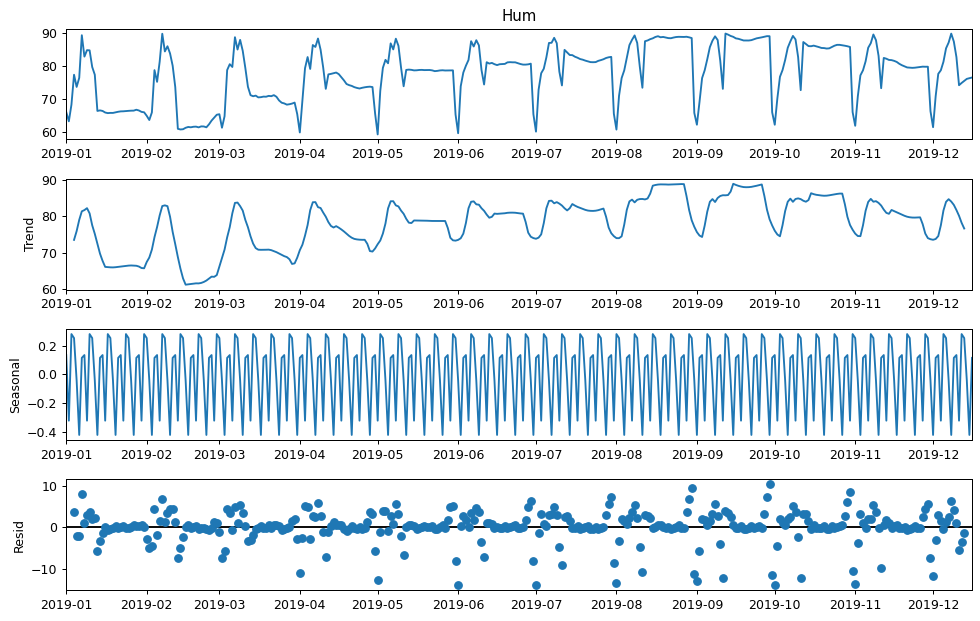

In [55]:
results.plot();

In [54]:
df.columns

Index(['Tem.', 'Hum', 'Presure', 'Drizzle', 'Fair', 'Fog', 'Light Rain',
       'Mist', 'Mostly Cloudy', 'Partly Cloudy', 'Rain', 'T-Storm',
       'Widespread Fog'],
      dtype='object')

In [56]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

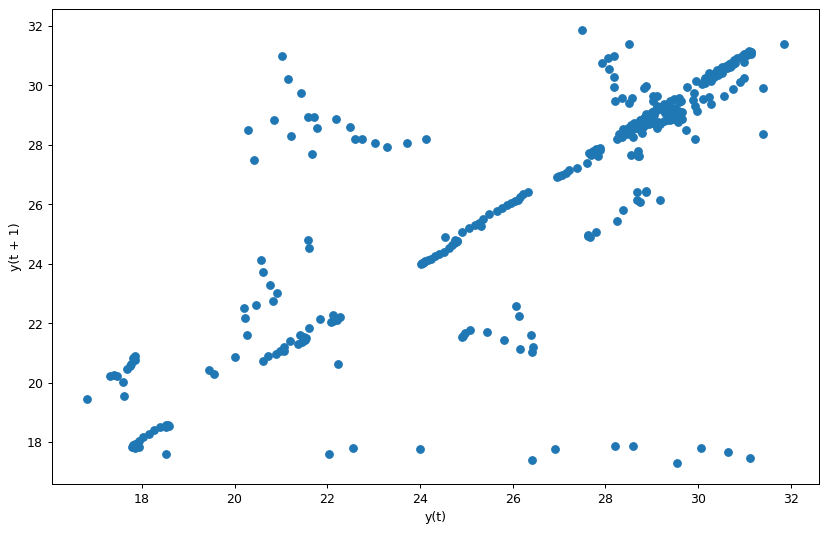

In [57]:
lag_plot(df['Tem.'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

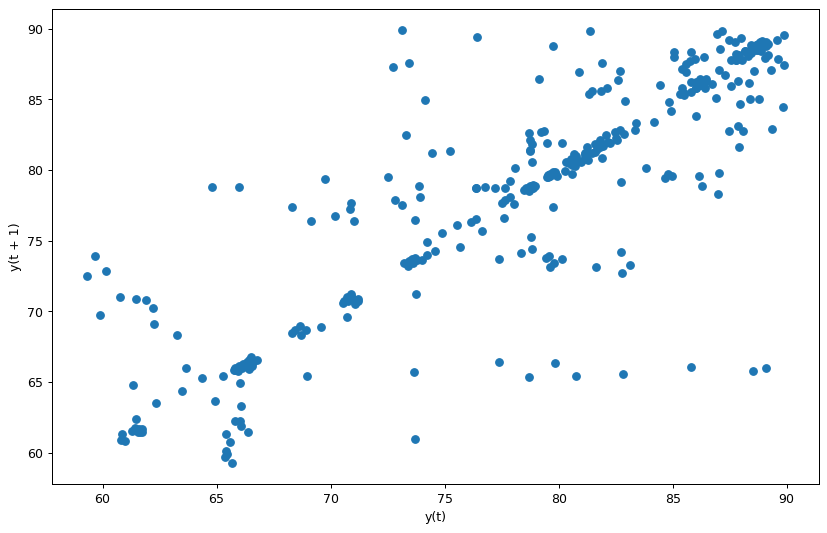

In [124]:
lag_plot(df['Hum'])

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

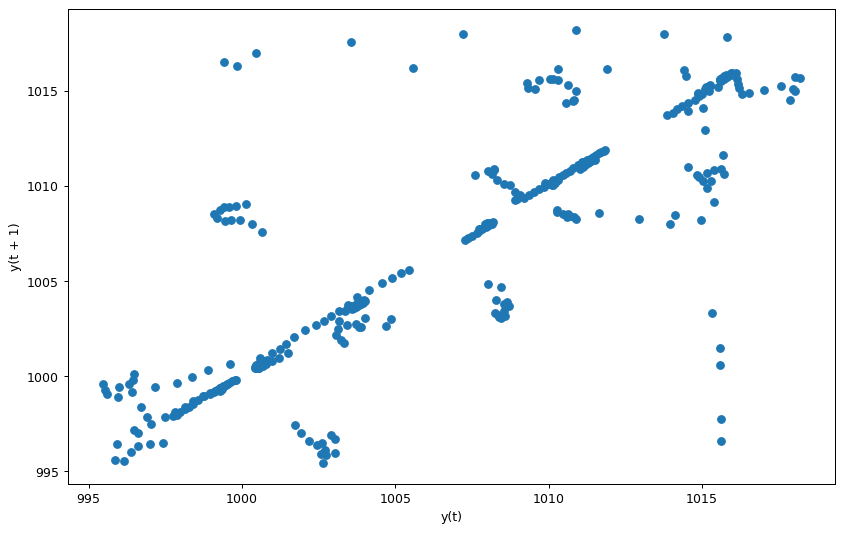

In [125]:
lag_plot(df['Presure'])

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [59]:
df.index

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10',
               '2019-12-11', '2019-12-12', '2019-12-13', '2019-12-14',
               '2019-12-15', '2019-12-16'],
              dtype='datetime64[ns]', length=350, freq='D')

In [181]:
df.head()

,Tem.,Hum,Presure
2019-01-01,16.808511,66.085106,1018.042553
2019-01-02,19.437500,63.270833,1015.020833
2019-01-03,20.416667,68.312500,1014.104167
2019-01-04,27.500000,77.395833,1008.458333
2019-01-05,31.854167,73.708333,1004.708333


In [117]:
df.tail(12)

,Tem.,Hum,Presure
2019-12-05,30.231834,81.332180,1001.730104
2019-12-06,29.605217,85.405217,997.440000
2019-12-07,29.105903,87.157986,996.473958
2019-12-08,28.560976,89.865854,1000.144599
2019-12-09,27.660345,87.456897,1009.063793
2019-12-10,24.906250,82.755208,1009.548611
2019-12-11,21.542314,74.215889,1015.091537
2019-12-12,21.503987,74.904306,1015.130781
2019-12-13,21.520000,75.528889,1015.220741
2019-12-14,21.446750,76.139696,1015.261411


In [21]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [60]:
#help(coint_johansen)

In [61]:
#coint_johansen(train,det_order=1,k_ar_diff=1)

In [53]:
# To check the stationarity import Augmented Dicky Fuler 
from statsmodels.tsa.stattools import adfuller

In [54]:
# Creating a function to check the check Adfuller test for stationarity check
def adf_test(series):
    print('Augmented Dickey-Fuller Test')
    print('\n')
    result = adfuller(series.dropna(),autolag='AIC')
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [55]:
df.columns

Index(['Tem.', 'Hum', 'Presure'], dtype='object')

In [56]:
adf_test(df['Tem.'])

Augmented Dickey-Fuller Test


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [57]:
adf_test(df.Presure)

Augmented Dickey-Fuller Test


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [58]:
adf_test(df['Presure'])

Augmented Dickey-Fuller Test


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [59]:
df.head()

,Tem.,Hum,Presure
2019-01-01,16.808511,66.085106,1018.042553
2019-01-02,19.437500,63.270833,1015.020833
2019-01-03,20.416667,68.312500,1014.104167
2019-01-04,27.500000,77.395833,1008.458333
2019-01-05,31.854167,73.708333,1004.708333


## Scaling the data

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [107]:
df_transformed = scaler.fit_transform(df.values)

In [108]:
len(df_transformed)

350

In [109]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [110]:
print(train.shape)
print(test.shape)

(338, 3)
(12, 3)


In [60]:
df1 = df['Tem.']

In [61]:
df2 = df['Hum']

In [62]:
df3 = df['Presure']

In [64]:
df1=scaler.fit_transform(df1.values.reshape(-1,1))

In [65]:
df2=scaler.fit_transform(df2.values.reshape(-1,1))

In [66]:
df3=scaler.fit_transform(df3.values.reshape(-1,1))

## Train and Test Split for the data

In [67]:
training_size=int(len(df1)*0.7)
test_size=len(df1)-training_size

In [68]:
train_dataT,test_dataT=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [69]:
train_dataH,test_dataH=df2[0:training_size,:],df2[training_size:len(df1),:1]

In [70]:
train_dataP,test_dataP=df3[0:training_size,:],df3[training_size:len(df1),:1]

In [79]:
train_dataT.shape,test_dataT.shape

((244, 1), (106, 1))

In [81]:
train_dataP.shape,test_dataP.shape

((244, 1), (106, 1))

In [82]:
train_dataH.shape,test_dataH.shape

((244, 1), (106, 1))

In [83]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [93]:
time_step = 7
X_train_T, y_train_T = create_dataset(train_dataT, time_step)
X_test_T, ytest_T = create_dataset(test_dataT, time_step)

In [94]:
time_step = 7
X_train_P, y_train_P = create_dataset(train_dataP, time_step)
X_test_P, ytest_P = create_dataset(test_dataP, time_step)

In [95]:
time_step = 7
X_train_H, y_train_H = create_dataset(train_dataH, time_step)
X_test_H, ytest_H = create_dataset(test_dataH, time_step)

In [89]:
X_train_T.shape,y_train_T.shape

((236, 7), (236,))

In [96]:
X_train_T =X_train_T.reshape(X_train_T.shape[0],X_train_T.shape[1] , 1)
X_test_T = X_test_T.reshape(X_test_T.shape[0],X_test_T.shape[1] , 1)

In [162]:
X_train_T.shape,X_test_T.shape

((236, 7, 1), (98, 7, 1))

In [179]:
X_train_P =X_train_P.reshape(X_train_P.shape[0],X_train_P.shape[1] , 1)
X_test_P = X_test_P.reshape(X_test_P.shape[0],X_test_P.shape[1] , 1)

In [180]:
X_train_P.shape,y_train_P.shape

((236, 7, 1), (236,))

In [181]:
X_train_H =X_train_H.reshape(X_train_H.shape[0],X_train_H.shape[1] , 1)
X_test_H = X_test_H.reshape(X_test_H.shape[0],X_test_H.shape[1] , 1)

#### For our VAR Model We'll fit a series of models using the first eight p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [53]:
from statsmodels.tsa.api import VAR 

In [111]:
for i in [1,2,3,4,5,6]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  -12.748093366026486
BIC:  -12.612066674144502

Order = 2
AIC:  -12.936475124281152
BIC:  -12.697905676783453

Order = 3
AIC:  -13.122236423534254
BIC:  -12.780672495311114

Order = 4
AIC:  -13.860992334835489
BIC:  -13.415978865595694

Order = 5
AIC:  -13.970087465499109
BIC:  -13.421166025501929

Order = 6
AIC:  -14.034940070262953
BIC:  -13.38164882559958



#### It seems that Order VAR(3) has the lowest combined score for AIC , BIC hence we will use it for our prediction

In [112]:
model.endog_names

['y1', 'y2', 'y3']

### Fitting the VAR(3) Model

In [123]:
train.shape

(338, 3)

In [124]:
test.shape

(12, 3)

In [113]:
results = model.fit(3)

In [114]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Jan, 2021
Time:                     21:16:43
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -12.7807
Nobs:                     335.000    HQIC:                  -12.9861
Log likelihood:           801.941    FPE:                2.00036e-06
AIC:                     -13.1222    Det(Omega_mle):     1.83141e-06
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.155938         0.092210            1.691           0.091
L1.y1         0.762172         0.088879            8.575           0.000
L1.y2         0.130669         0.103922            1.257           0.209
L1.y3        -0.005600

In [63]:
# Lag order
results.k_ar

1

In [118]:
lag_order = results.k_ar

In [119]:
lag_order

3

In [125]:
z = results.forecast(y=train[-lag_order:], steps=12)
z

array([[0.82428331, 0.6286091 , 0.37383952],
       [0.86958496, 0.67503771, 0.30889461],
       [0.82760584, 0.68484967, 0.31294994],
       [0.80008235, 0.6747863 , 0.33416313],
       [0.76276432, 0.66247686, 0.36528785],
       [0.73190926, 0.64636196, 0.4022259 ],
       [0.70416623, 0.63027459, 0.43508851],
       [0.68096877, 0.61467217, 0.46392547],
       [0.66519906, 0.60380071, 0.48350253],
       [0.65539575, 0.59731621, 0.49587961],
       [0.65072077, 0.59472299, 0.50185794],
       [0.64906148, 0.5946769 , 0.50389244]])

In [126]:
idx = pd.date_range('2019-12-05', periods=12, freq='D')
idx

DatetimeIndex(['2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08',
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-14', '2019-12-15', '2019-12-16'],
              dtype='datetime64[ns]', freq='D')

In [131]:
df_forecast = pd.DataFrame(z, index=idx, columns=['Tem','Hum','Presure'])

In [132]:
df_forecast

,Tem,Hum,Presure
2019-12-05,0.824283,0.628609,0.373840
2019-12-06,0.869585,0.675038,0.308895
2019-12-07,0.827606,0.684850,0.312950
2019-12-08,0.800082,0.674786,0.334163
2019-12-09,0.762764,0.662477,0.365288
2019-12-10,0.731909,0.646362,0.402226
2019-12-11,0.704166,0.630275,0.435089
2019-12-12,0.680969,0.614672,0.463925
2019-12-13,0.665199,0.603801,0.483503
2019-12-14,0.655396,0.597316,0.495880


In [133]:
df_test = pd.DataFrame(test, index=idx, columns=['Tem','Hum','Presure'])

In [134]:
df_test

,Tem,Hum,Presure
2019-12-05,0.892173,0.720301,0.275821
2019-12-06,0.850525,0.853461,0.087150
2019-12-07,0.817338,0.910765,0.044665
2019-12-08,0.781120,0.999294,0.206093
2019-12-09,0.721260,0.920537,0.598343
2019-12-10,0.538211,0.766824,0.619665
2019-12-11,0.314629,0.487647,0.863432
2019-12-12,0.312082,0.510154,0.865158
2019-12-13,0.313146,0.530573,0.869114
2019-12-14,0.308278,0.550542,0.870903


### Let's evaluate the model

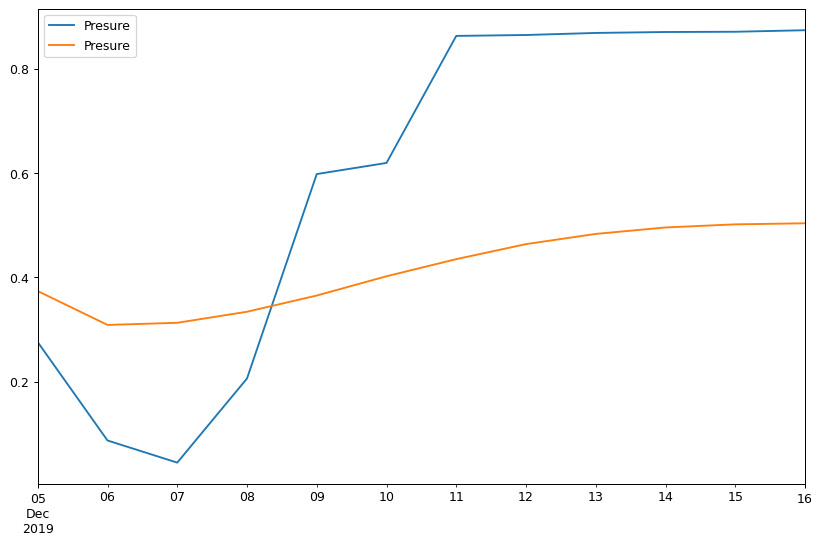

In [140]:
df_test['Presure'].plot(legend=True).autoscale(axis='x',tight=True)
df_forecast['Presure'].plot(legend=True);

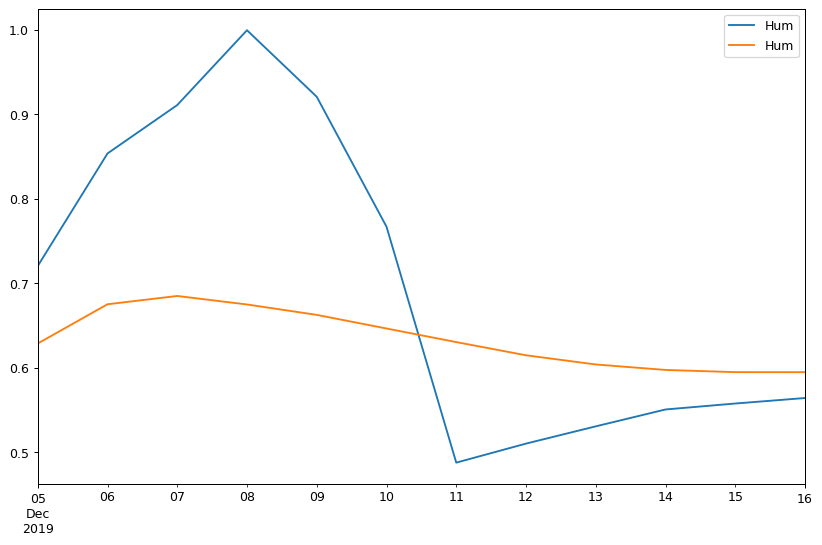

In [141]:
df_test['Hum'].plot(legend=True).autoscale(axis='x',tight=True)
df_forecast['Hum'].plot(legend=True);

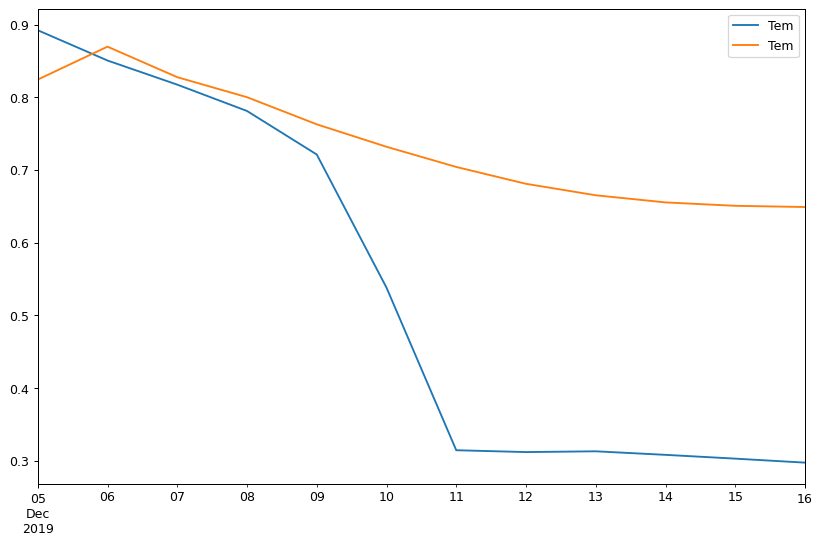

In [142]:
df_test['Tem'].plot(legend=True).autoscale(axis='x',tight=True)
df_forecast['Tem'].plot(legend=True);

In [145]:
from statsmodels.tools.eval_measures import rmse,mse

In [146]:
RMSE1 = rmse(z,test)
print( 'Money VAR(3) RMSE: {}'.format(RMSE1) )

Money VAR(3) RMSE: [0.26161897 0.16299843 0.31042091]


In [148]:
RMSE1 = mse(z,test)
print( 'Money VAR(3) MSE: {}'.format(RMSE1) )

Money VAR(3) MSE: [0.06844449 0.02656849 0.09636114]


## Prediction with  RNN Model

Standard RNNs (Recurrent Neural Networks) suffer from vanishing and exploding gradient problems. LSTMs (Long Short Term Memory) deal with these problems by introducing new gates, such as input and forget gates, which allow for a better control over the gradient flow and enable better preservation of “long-range dependencies”. The long range dependency in RNN is resolved by increasing the number of repeating layer in LSTM

In [149]:
#Importing all the necessary library for the model building
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,Flatten
from keras.callbacks import EarlyStopping
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [168]:
# Defining the Model
model = Sequential()
model.add(LSTM(200, activation='relu', return_sequences=True,input_shape=(7, 1) ))
model.add(LSTM(50,activation='relu',return_sequences=False))
model.add((Dense(1)))
model.compile(optimizer='adam', loss='mse')

In [169]:
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

In [170]:
# Generating a summary fo the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7, 200)            161600    
_________________________________________________________________
lstm_4 (LSTM)                (None, 50)                50200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 211,851
Trainable params: 211,851
Non-trainable params: 0
_________________________________________________________________


In [171]:
X_train_T.shape,y_train_T.shape

((236, 7, 1), (236,))

In [182]:
X_test_T.shape,ytest_T.shape

((98, 7, 1), (98,))

In [174]:
history=model.fit(X_train_T, y_train_T, epochs=50, verbose=2,validation_data=(X_test_T, ytest_T) ,use_multiprocessing=True)

Train on 236 samples, validate on 98 samples
Epoch 1/50
 - 0s - loss: 0.0352 - val_loss: 0.0224
Epoch 2/50
 - 0s - loss: 0.0405 - val_loss: 0.0314
Epoch 3/50
 - 0s - loss: 0.0379 - val_loss: 0.0249
Epoch 4/50
 - 0s - loss: 0.0349 - val_loss: 0.0244
Epoch 5/50
 - 0s - loss: 0.0333 - val_loss: 0.0205
Epoch 6/50
 - 0s - loss: 0.0345 - val_loss: 0.0213
Epoch 7/50
 - 0s - loss: 0.0340 - val_loss: 0.0213
Epoch 8/50
 - 0s - loss: 0.0338 - val_loss: 0.0202
Epoch 9/50
 - 0s - loss: 0.0313 - val_loss: 0.0198
Epoch 10/50
 - 0s - loss: 0.0308 - val_loss: 0.0197
Epoch 11/50
 - 0s - loss: 0.0318 - val_loss: 0.0206
Epoch 12/50
 - 0s - loss: 0.0357 - val_loss: 0.0196
Epoch 13/50
 - 0s - loss: 0.0319 - val_loss: 0.0205
Epoch 14/50
 - 0s - loss: 0.0335 - val_loss: 0.0190
Epoch 15/50
 - 0s - loss: 0.0306 - val_loss: 0.0192
Epoch 16/50
 - 0s - loss: 0.0310 - val_loss: 0.0203
Epoch 17/50
 - 0s - loss: 0.0303 - val_loss: 0.0192
Epoch 18/50
 - 0s - loss: 0.0291 - val_loss: 0.0187
Epoch 19/50
 - 0s - loss: 0.

In [176]:
X_train_P.shape,y_train_P.shape

((236, 7, 1), (236,))

In [184]:
X_test_P.shape,ytest_P.shape

((98, 7, 1), (98,))

In [185]:
history1=model.fit(X_train_P, y_train_P, epochs=50,  validation_data=(X_test_P, ytest_P), use_multiprocessing=True )

Train on 236 samples, validate on 98 samples
Epoch 1/50
236/236 [==============================] - 0s 482us/step - loss: 0.0353 - val_loss: 0.0236
Epoch 2/50
236/236 [==============================] - 0s 456us/step - loss: 0.0339 - val_loss: 0.0233
Epoch 3/50
236/236 [==============================] - 0s 452us/step - loss: 0.0308 - val_loss: 0.0223
Epoch 4/50
236/236 [==============================] - 0s 452us/step - loss: 0.0299 - val_loss: 0.0233
Epoch 5/50
236/236 [==============================] - 0s 452us/step - loss: 0.0298 - val_loss: 0.0224
Epoch 6/50
236/236 [==============================] - 0s 448us/step - loss: 0.0290 - val_loss: 0.0228
Epoch 7/50
236/236 [==============================] - 0s 444us/step - loss: 0.0290 - val_loss: 0.0219
Epoch 8/50
236/236 [==============================] - 0s 461us/step - loss: 0.0283 - val_loss: 0.0250
Epoch 9/50
236/236 [==============================] - 0s 469us/step - loss: 0.0292 - val_loss: 0.0200
Epoch 10/50
236/236 [================

In [186]:
history2=model.fit(X_train_H, y_train_H, epochs=50,  validation_data=(X_test_H, ytest_H), use_multiprocessing=True )

Train on 236 samples, validate on 98 samples
Epoch 1/50
236/236 [==============================] - 0s 490us/step - loss: 0.0254 - val_loss: 0.0308
Epoch 2/50
236/236 [==============================] - 0s 478us/step - loss: 0.0238 - val_loss: 0.0355
Epoch 3/50
236/236 [==============================] - 0s 465us/step - loss: 0.0235 - val_loss: 0.0290
Epoch 4/50
236/236 [==============================] - 0s 452us/step - loss: 0.0221 - val_loss: 0.0289
Epoch 5/50
236/236 [==============================] - 0s 440us/step - loss: 0.0203 - val_loss: 0.0316
Epoch 6/50
236/236 [==============================] - 0s 446us/step - loss: 0.0218 - val_loss: 0.0262
Epoch 7/50
236/236 [==============================] - 0s 450us/step - loss: 0.0204 - val_loss: 0.0279
Epoch 8/50
236/236 [==============================] - 0s 465us/step - loss: 0.0209 - val_loss: 0.0310
Epoch 9/50
236/236 [==============================] - 0s 448us/step - loss: 0.0208 - val_loss: 0.0267
Epoch 10/50
236/236 [================

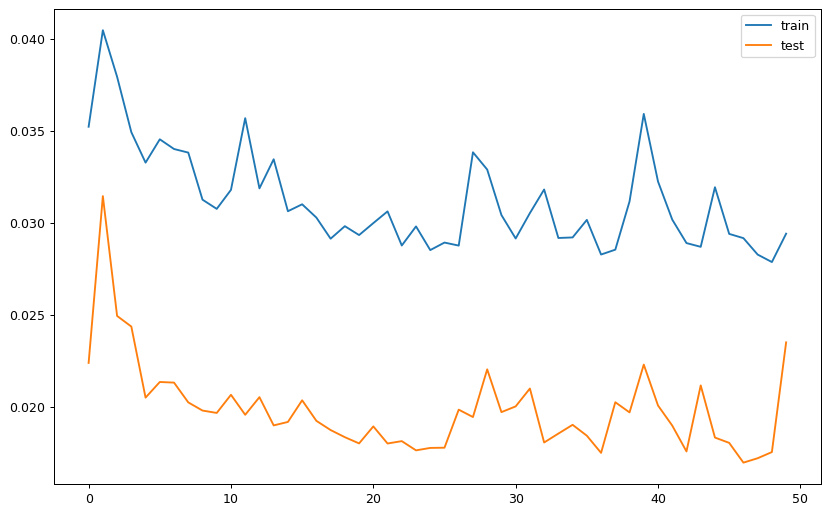

In [187]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()

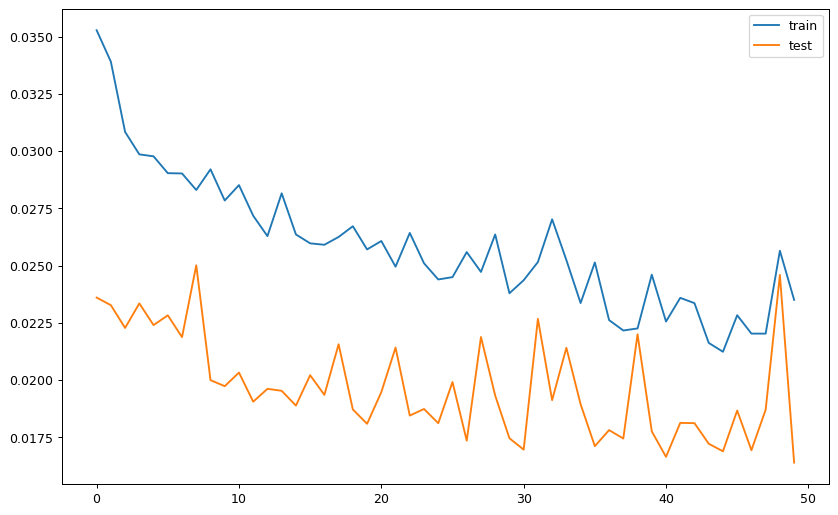

In [188]:
plt.plot(history1.history['loss'],label='train')
plt.plot(history1.history['val_loss'],label='test')
plt.legend()

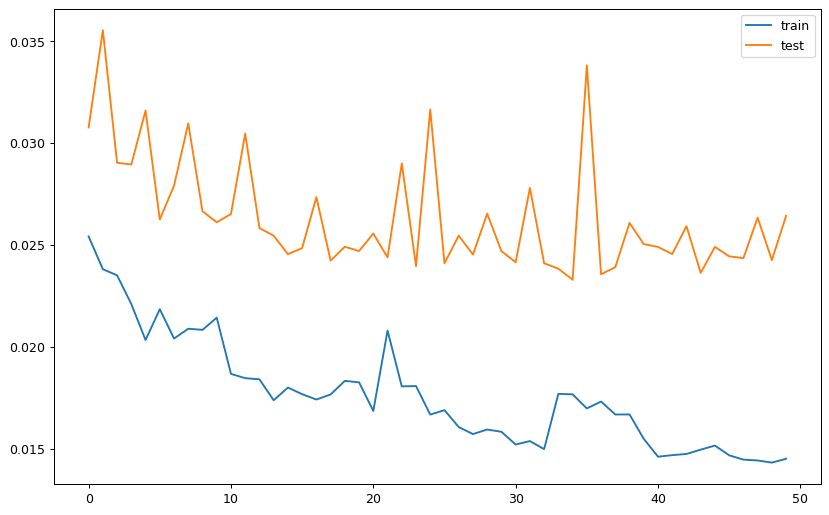

In [189]:
plt.plot(history2.history['loss'],label='train')
plt.plot(history2.history['val_loss'],label='test')
plt.legend()

In [190]:
model.save('RNN_Model.h5')

array([0.87433447])

In [192]:
y_hatT = model.predict(X_test_T)

In [194]:
y_hatP = model.predict(X_test_P)

In [195]:
y_hatH = model.predict(X_test_H)

In [198]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [199]:
print('The MSE for Temprarture is {}'.format(mean_squared_error(y_hatT,ytest_T)))

The MSE for Temprarture is 0.02193346598165444


In [200]:
print('The MSE for Presure is {}'.format(mean_squared_error(y_hatP,ytest_P)))

The MSE for Presure is 0.02476399434545737


In [ ]:
print('The MSE for Presure is {}'.format(mean_squared_error(y_hatP,ytest_P)))

In [201]:
print('The MSE for Humidity is {}'.format(mean_squared_error(y_hatH,ytest_H)))

The MSE for Humidity is 0.026429907087854435


#### Note : Many series should be stationary after you take first differences. However, some series, such as capital stocks, money and probably prices seem to have two unit roots, I(2)

#### Unit root tests are tests for stationarity in a time series. A time series has stationarity if a shift in time doesn’t cause a change in the shape of the distribution; unit roots are one cause for non-stationarity.